In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB

Automatically created module for IPython interactive environment


1    102862
0     15180
Name: Class, dtype: int64
1    15180
0    15180
Name: Class, dtype: int64
Accuracy Score: 0.619095180227062
Precession Score: 0.573512252042007
Recall Score: 0.8753339269813001
F1 Score: 0.6929855481142052


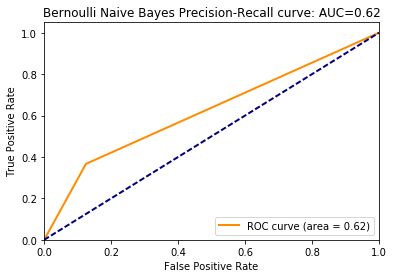

In [16]:
file = "C:\\Users\\Pavan\\Desktop\\Book1.csv";

df = pd.read_csv(file)#, 

y = df.Class
X = df.drop('Class', axis=1)

df_majority = df[df.Class==1]
df_minority = df[df.Class==0]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15180,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print(df_downsampled.Class.value_counts())


y = df_downsampled.Class
X = df_downsampled.drop('Class', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifiers = [
    KNeighborsClassifier(10),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=10000),
    RandomForestClassifier(max_depth=10000, n_estimators=50, max_features=4),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel="rbf", C=0.025),
    SVC(gamma=2, C=1),
    BernoulliNB()]

clf = BernoulliNB()
name = 'Bernoulli Naive Bayes'

clf.fit(X_train, y_train)
    
y_pdct = clf.predict(X_test)

scores = cross_val_score(clf, X_train, y_train, cv=10)

avg_score = 0.0
    
for score in scores:
    avg_score += score

print('Accuracy Score: {}'.format(avg_score/10))
print('Precession Score: {}'.format(precision_score(y_test, y_pdct, average='binary', pos_label=0)))
print('Recall Score: {}'.format(recall_score(y_test, y_pdct, average='binary', pos_label=0)))
print('F1 Score: {}'.format(f1_score(y_test, y_pdct, average='binary', pos_label=0)))

fpr, tpr, _ = roc_curve(y_test, y_pdct, pos_label=1)
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_test, y_pdct)    
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('{} Precision-Recall curve: AUC={:.2f}'.format(
          name,roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()